In [2]:
from call_of_func.utils.get_source_path import ROOT
import torch, json
from pathlib import Path

data_root = Path(ROOT / "data/processed")

labels = json.load(open(data_root / "labels.json"))
y_train = torch.load(data_root / "train_y.pt")
y_val   = torch.load(data_root / "val_y.pt")
y_test  = torch.load(data_root / "test_y.pt")

print("Num labels.json:", len(labels))
print("Max label train:", y_train.max().item())
print("Unique train labels:", torch.unique(y_train))
print("Max label val:", y_val.max().item())
print("Unique val labels:", torch.unique(y_val))
print("Max label test:", y_test.max().item())
print("Unique test labels:", torch.unique(y_test))

Num labels.json: 88
Max label train: 87
Unique train labels: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87])
Max label val: 87
Unique val labels: tensor([ 0,  1,  2,  3,  4,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20,
        22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
        42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61,
        62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 79, 80, 81, 84,
        85, 86, 87])
Max label test: 87
Unique test labels: tensor([ 0,  1,  3,  4,  5,  6,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21,
        22, 23, 24, 26, 27, 28, 29, 30, 31, 33, 3

In [3]:
def class_hist(y):
    return torch.bincount(y, minlength=y.max()+1)

print("Train counts:", class_hist(y_train))
print("Val counts:  ", class_hist(y_val))
print("Test counts: ", class_hist(y_test))


Train counts: tensor([ 436,  268,   76,  431, 1112,  115,  457,   72,  127,  321,  124,  385,
         210,  631, 1074,  221,   83, 1401,  588,  312,  377,   59,  860,  419,
         406,   82,  504,  248,  461,  274,  383,  149,  101,  761,  160,  670,
         362,  811,  671,  136,  262,   84,  427,  352,   90,  167,   51,   52,
         111,  701,   77,  208,  694,  658,  184,   53,  500,  386,  285,  506,
         702,  334,  583,  512,   74,   84,  178,  311,  382,  283,  728,  355,
         365,   57,  279,  741,  108, 1048,   52,  800,  291,  631,  218,  359,
         119,  154,  344,  465])
Val counts:   tensor([  3,  13,  73,  37,  34,   0,  86,   0,   8,  25,   2,  38,   5, 145,
         42,  14,   8, 473,   6,   0,  65,   0,  17,  18,  24,   0,  83,   6,
         26,  68,   0,  40,  24, 127,  10,  85,   8,  24,  63,  42, 106,   4,
         34,  21,  32,  32,  12,   0,  46,  34,  21,  43,  26,  83,  34,  16,
          8,  40,  40,   0, 216,  25,  30,   4,   0,  16,  70,  29,

In [4]:
train_classes = set(torch.unique(y_train).tolist())
val_classes   = set(torch.unique(y_val).tolist())
test_classes  = set(torch.unique(y_test).tolist())

print("Val ⊆ Train:", val_classes.issubset(train_classes))
print("Test ⊆ Train:", test_classes.issubset(train_classes))


Val ⊆ Train: True
Test ⊆ Train: True


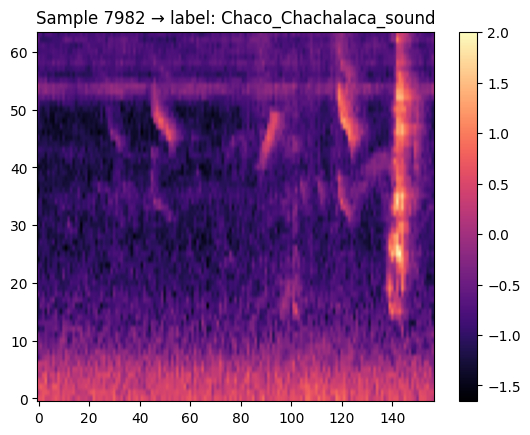

In [5]:
import random
import matplotlib.pyplot as plt

x_train = torch.load(data_root / "train_x.pt")

i = random.randint(0, len(y_train)-1)
label = labels[y_train[i]]
spec  = x_train[i, 0]

plt.imshow(spec, origin="lower", aspect="auto", cmap="magma")
plt.title(f"Sample {i} → label: {label}")
plt.colorbar()
plt.show()

In [ ]:


train_g = set(json.load(open(data_root / "train_group.json")))
val_g   = set(json.load(open(data_root / "val_group.json")))
test_g  = set(json.load(open(data_root / "test_group.json")))

print("Train ∩ Val:", len(train_g & val_g))
print("Train ∩ Test:", len(train_g & test_g))
print("Val ∩ Test:", len(val_g & test_g))

NameError: name 'root' is not defined